# Data Analysis and Feature class creation for the Data from climtedata.ca.
Using Pandas, Matplotlib and ArcPy.

- Anand Charvin G

In [2]:
# Importing pandas to do some clean up and data analysis processes. Will do things one step at a time.
import pandas as pd

# Import the required file for the analysis and all future activities.
# I'm taking the tx_mean.csv file which represents Annual mean of daily maximum temperature.

txmdf = pd.read_csv(r"C:\Users\tx_mean\tx_mean.csv")

txmdf.head()


,time,lat,lon,ssp126_tx_mean_p10,ssp126_tx_mean_p50,ssp126_tx_mean_p90,ssp245_tx_mean_p10,ssp245_tx_mean_p50,ssp245_tx_mean_p90,ssp585_tx_mean_p10,ssp585_tx_mean_p50,ssp585_tx_mean_p90
0,1950-01-01,44.041667,-79.125002,10.17,11.29,12.05,10.17,11.29,12.05,10.17,11.29,12.05
1,1951-01-01,44.041667,-79.125002,9.94,11.31,12.47,9.94,11.31,12.47,9.94,11.31,12.47
2,1952-01-01,44.041667,-79.125002,10.18,11.19,11.88,10.18,11.19,11.88,10.18,11.19,11.88
3,1953-01-01,44.041667,-79.125002,9.97,10.86,12.45,9.97,10.86,12.45,9.97,10.86,12.45
4,1954-01-01,44.041667,-79.125002,10.02,10.76,11.76,10.02,10.76,11.76,10.02,10.76,11.76


In [4]:
# Column Names which will give us an idea about which one to use,
# More details about what each of them represents is included in the metadata file which comes with the dataset.

txmdf.columns

Index(['time', 'lat', 'lon', 'ssp126_tx_mean_p10', 'ssp126_tx_mean_p50',
       'ssp126_tx_mean_p90', 'ssp245_tx_mean_p10', 'ssp245_tx_mean_p50',
       'ssp245_tx_mean_p90', 'ssp585_tx_mean_p10', 'ssp585_tx_mean_p50',
       'ssp585_tx_mean_p90'],
      dtype='object')

In [5]:
# Time colum conversion to extract the year from it. Will help with data consistency
# Convert the 'time' column to datetime
txmdf['time'] = pd.to_datetime(txmdf['time'])

# Extract the year from the 'time' column
txmdf['year'] = txmdf['time'].dt.year

# Define the time periods
time_periods = [(1950, 2000), (2011, 2040), (2041, 2070), (2071, 2100)]
print (time_periods)

[(1950, 2000), (2011, 2040), (2041, 2070), (2071, 2100)]


In [6]:
# Mean value extraction on the yearly window manner.

# Initialize an empty dictionary to store the results
results = {}

# Loop over the time periods
for start, end in time_periods:
    # Filter the data for the current time period
    mask = (txmdf['year'] >= start) & (txmdf['year'] <= end)
    filtered_data = txmdf.loc[mask]
    
    # Calculate the mean of 'ssp245_tg_mean_p50' for the current time period
    mean_value = filtered_data['ssp245_tx_mean_p50'].mean()
    
    # Store the result in the dictionary
    results[f'{start}-{end}'] = mean_value

print (results)

{'1950-2000': 11.193994528043776, '2011-2040': 13.181360465116281, '2041-2070': 14.425635658914729, '2071-2100': 15.318267441860463}


In [7]:
# Convert the results to a pandas DataFrame for better visualization
results_df = pd.DataFrame(list(results.items()), columns=['Time Period', 'Average of Annual mean of daily maximum temperature.'])
print (results_df)

  Time Period  Average of Annual mean of daily maximum temperature.
0   1950-2000                                          11.193995   
1   2011-2040                                          13.181360   
2   2041-2070                                          14.425636   
3   2071-2100                                          15.318267   


# Plotting and Feature Class Creation Blocks.

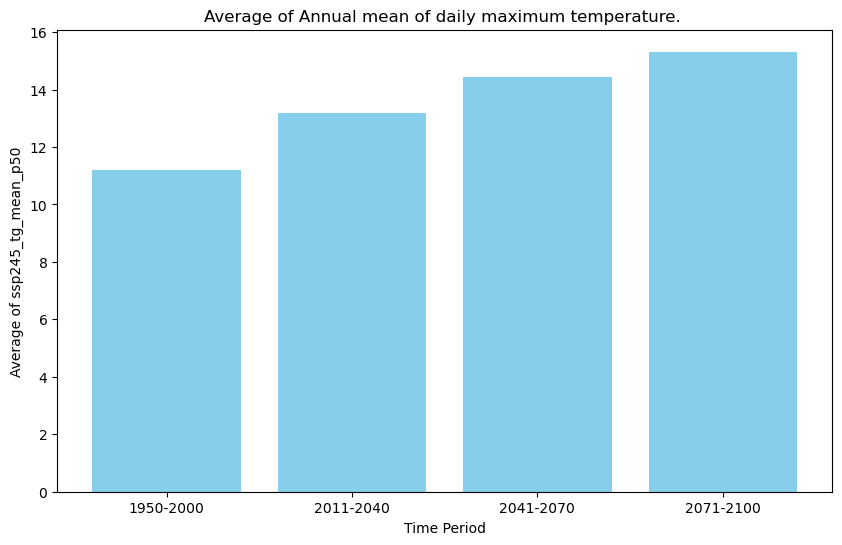

In [8]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(results_df['Time Period'], results_df['Average of Annual mean of daily maximum temperature.'], color='skyblue')

# Add title and labels
plt.title('Average of Annual mean of daily maximum temperature.')
plt.xlabel('Time Period')
plt.ylabel('Average of Temperature')

# Show the plot
plt.show()


# Featuring the Data into Individual location

In [10]:
# Initialize an empty dictionary to store the results
results = {}

# Loop over the unique lat, lon pairs in the data
for lat, lon in txmdf[['lat', 'lon']].drop_duplicates().values:
    # Filter the data for the current lat, lon pair
    mask = (txmdf['lat'] == lat) & (txmdf['lon'] == lon)
    filtered_data = txmdf.loc[mask]

    # Loop over the time periods
    for start, end in time_periods:
        # Further filter the data for the current time period
        mask = (filtered_data['year'] >= start) & (filtered_data['year'] <= end)
        period_data = filtered_data.loc[mask]
        
        # Calculate the mean of 'ssp245_tg_mean_p50' for the current time period and lat, lon pair
        mean_value = period_data['ssp245_tx_mean_p50'].mean()
        
        # Store the result in the dictionary
        results[(lat, lon, f'{start}-{end}')] = mean_value

# Convert the results to a pandas DataFrame for better visualization
results_txmdf = pd.DataFrame(list(results.items()), columns=['Lat, Lon, Time Period', 'Average of Annual mean of daily maximum temperature.'])
print(results_txmdf)

                        Lat, Lon, Time Period  \
0    (44.041666545, -79.125002475, 1950-2000)   
1    (44.041666545, -79.125002475, 2011-2040)   
2    (44.041666545, -79.125002475, 2041-2070)   
3    (44.041666545, -79.125002475, 2071-2100)   
4    (44.041666545, -79.041669145, 1950-2000)   
..                                        ...   
339  (44.874999845, -78.458335835, 2071-2100)   
340  (44.874999845, -78.375002505, 1950-2000)   
341  (44.874999845, -78.375002505, 2011-2040)   
342  (44.874999845, -78.375002505, 2041-2070)   
343  (44.874999845, -78.375002505, 2071-2100)   

     Average of Annual mean of daily maximum temperature.  
0                                            11.203725     
1                                            13.199667     
2                                            14.466333     
3                                            15.352000     
4                                            11.317059     
..                                                 

# Feature Class Creation with Point Data

In [ ]:
import arcpy

# Define the spatial reference
sr = arcpy.SpatialReference(4326)  # WGS 1984

arcpy.env.overwriteOutput = True

# Loop over the time periods
for start, end in time_periods:
    # Define the name of the new feature class
    out_fc = f'HotDays30Data_{start}_{end}'

    # Create the new feature class
    arcpy.management.CreateFeatureclass(arcpy.env.workspace, out_fc, 'POINT', spatial_reference=sr)

    # Add fields for the time period and temperature
    arcpy.management.AddField(out_fc, 'TimePeriod', 'TEXT')
    arcpy.management.AddField(out_fc, 'HotDays', 'FLOAT')
    
    # Split the 'Lat, Lon, Time Period' column into separate columns
    results_txmdf[['Lat', 'Lon', 'Time Period']] = pd.DataFrame(results_txmdf['Lat, Lon, Time Period'].tolist(), index=results_txmdf.index)

    # Filter the results for the current time period
    mask = results_txmdf['Time Period'] == f'{start}-{end}'
    period_data = results_txmdf.loc[mask]

    # Insert the data into the new feature class
    with arcpy.da.InsertCursor(out_fc, ['SHAPE@XY', 'TimePeriod', 'HotDays']) as cursor:
        for row in period_data.itertuples():
            lat, lon, time_period = row[1]
            temperature = row[2]
            cursor.insertRow(((lon, lat), time_period, temperature))


The ArcPy Section is set such that, it runs within an arcgis notebook, 
this can be changed or put into an independet script and inputs and output locations can be set and used as such.